In [1]:
# Kerakli kutubxonalarni chaqirib olamiz
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
# Ma'lumotlar to‘plamini shakllantirib olish
data = {
    "x1":[10.3, 9.3, 2.7, 11.8, 2.9, 4.3, 3.5, 11.3, 9.7, 2.1, 9.6, 8.5, 4.7, 3.0],
    "x2":[3.8, 5.1, 8.2, 4.7, 10.6, 9.6, 8.5, 4.3, 3.5, 10.4, 4.0, 3.3, 11.5, 10.3],
    "y":["qimmat", "qimmat", "arzon", "qimmat", "arzon", "arzon", "arzon", "qimmat", "qimmat", "arzon", "qimmat", "qimmat", "arzon", "arzon"]
}
df = pd.DataFrame(data)

data = np.array(df.iloc[:, :2])
target = np.array(df["y"])


In [3]:
# Evklid masofasini hisoblash funksiyasi
def euclidean_distance(x1, x2):

  return np.sqrt(np.sum((x1 - x2)**2))

# KNN sinflash funksiyasi
def knn_classify(data, target, query, k):

  distances = []
  for i in range(len(data)):
    distance = euclidean_distance(data[i], query)
    distances.append((distance, target[i]))
  distances.sort(key=lambda x: x[0])

  k_nearest_neighbors = [neighbor for _, neighbor in distances[:k]]
  class_counts = {}
  for neighbor in k_nearest_neighbors:
    class_counts[neighbor] = class_counts.get(neighbor, 0) + 1
  return max(class_counts, key=class_counts.get)



In [4]:
# Kiruvchi qiymat
query = np.array([4.5, 5.5])
k = 3

# Bashorat qiymati
predicted_class = knn_classify(data, target, query, k)
print(f"Predicted class for query point {query}: {predicted_class}")


Predicted class for query point [4.5 5.5]: arzon


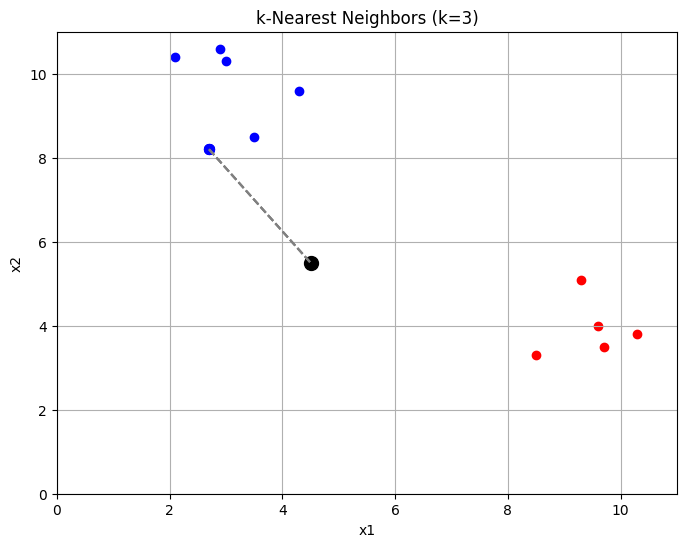

In [7]:
# nuqtalarni rangini aniqlash
colors = {
    'qimmat': 'red',
    'arzon': 'blue'
}

# m'lumotlar to‘plami
plt.figure(figsize=(8, 6))
for i in range(len(data)):
  x, y = data[i]
  plt.scatter(x, y, color=colors[target[i]])

# kiruvchi qiymat
query = np.array([4.5, 5.5])
plt.scatter(query[0], query[1], marker='o', color='black', s=100)

# KNN grafigi
k = 3
distances = []
for i in range(len(data)):
  distance = np.sqrt(np.sum((data[i] - query)**2))
  distances.append((distance, target[i]))
distances.sort(key=lambda x: x[0])

k_nearest_neighbors = [neighbor for _, neighbor in distances[:k]]
for neighbor in k_nearest_neighbors:
  x, y = data[np.where(target == neighbor)[0][0]]
  plt.plot([x, query[0]], [y, query[1]], linestyle='--', color='gray')
  plt.scatter(x, y, marker='o', color=colors[neighbor], s=50)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f"k-Nearest Neighbors (k={k})")
plt.xlim(0, 11)
plt.ylim(0, 11)
plt.grid(True)
plt.show()
